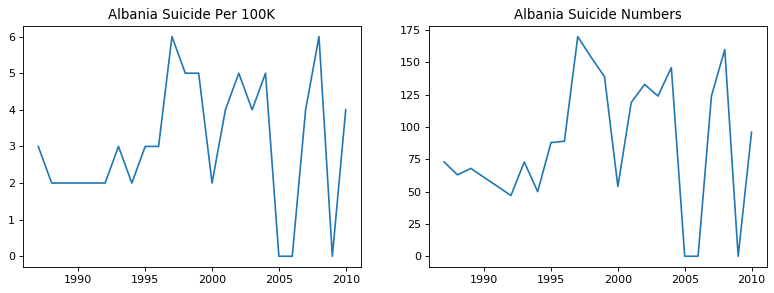

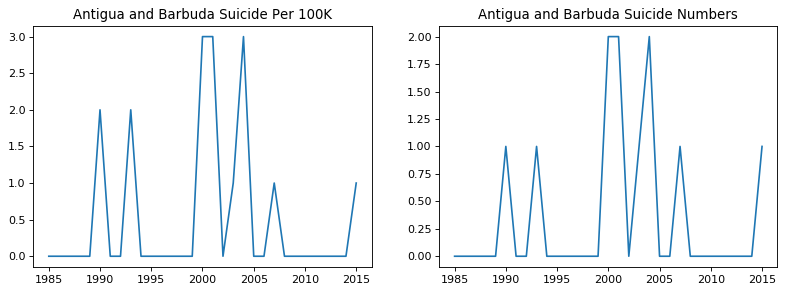

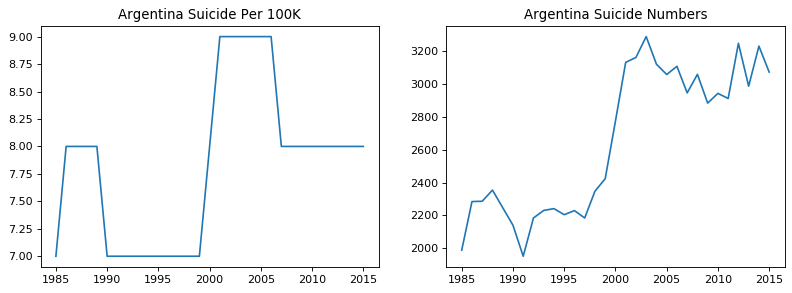

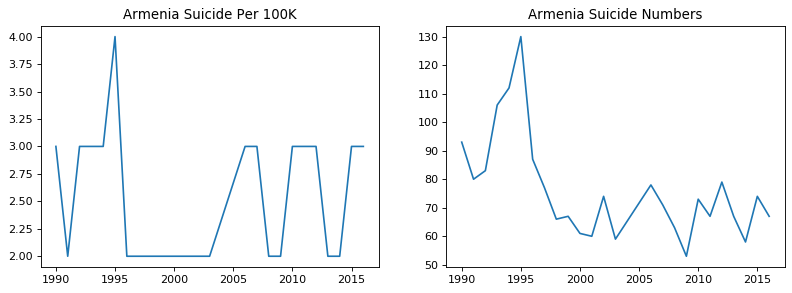

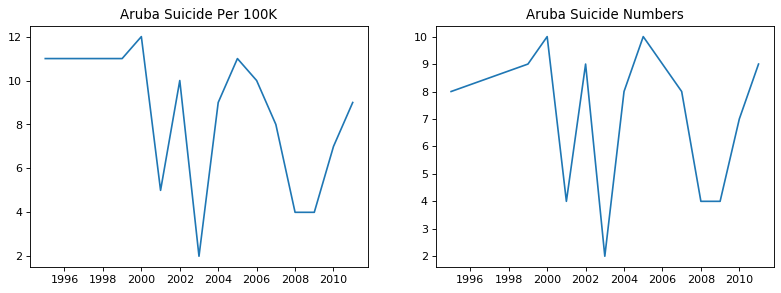

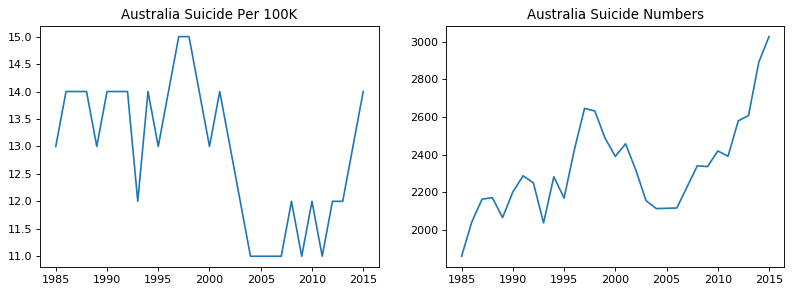

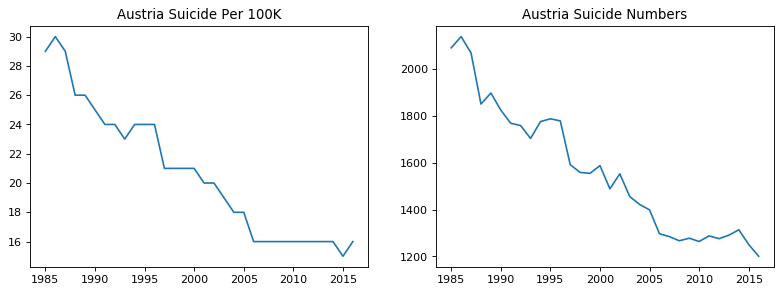

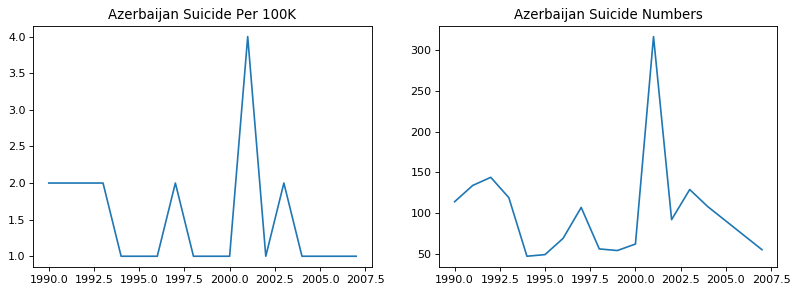

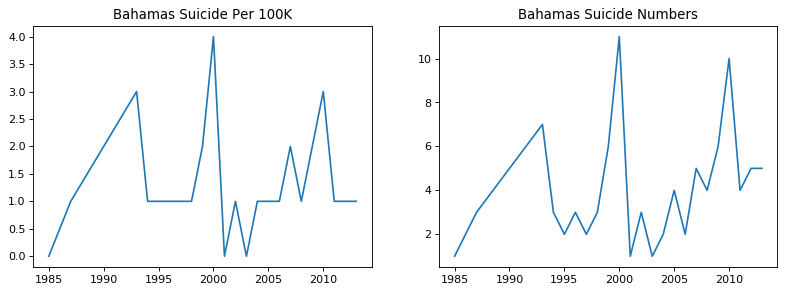

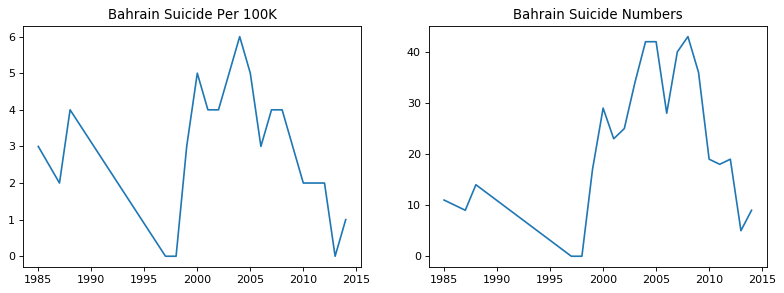

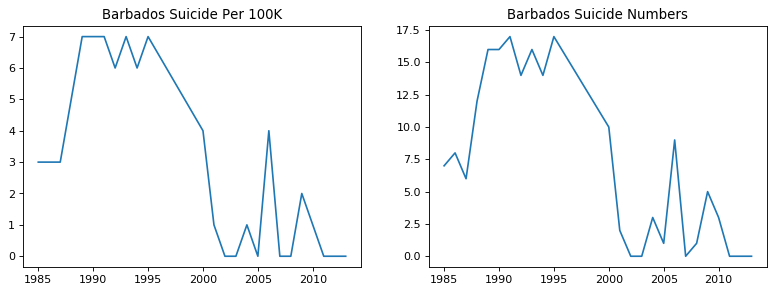

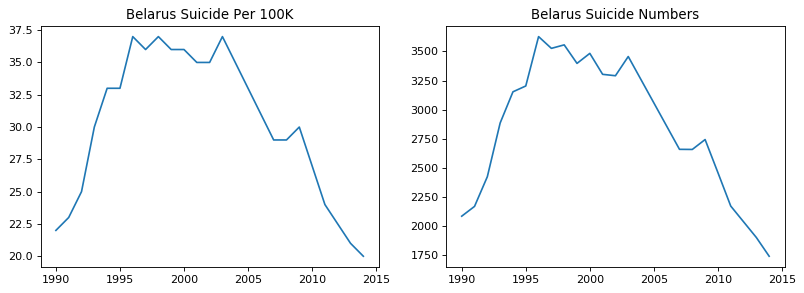

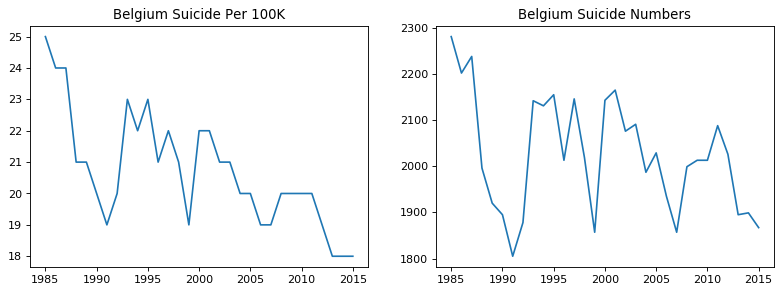

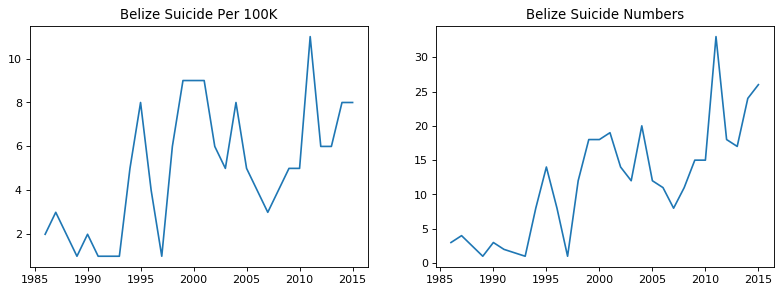

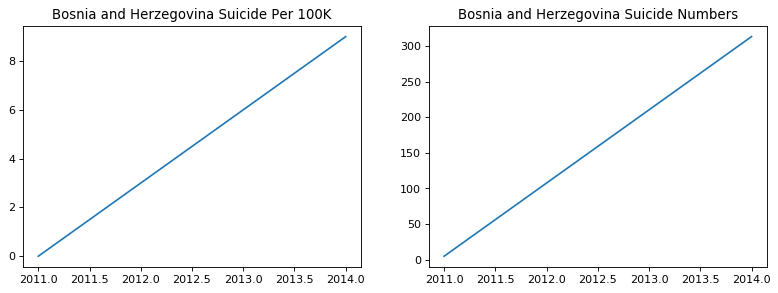

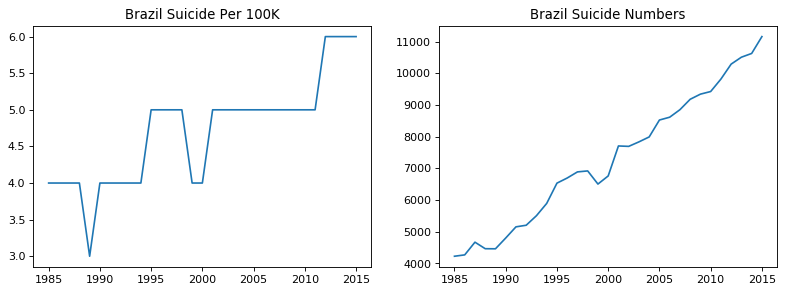

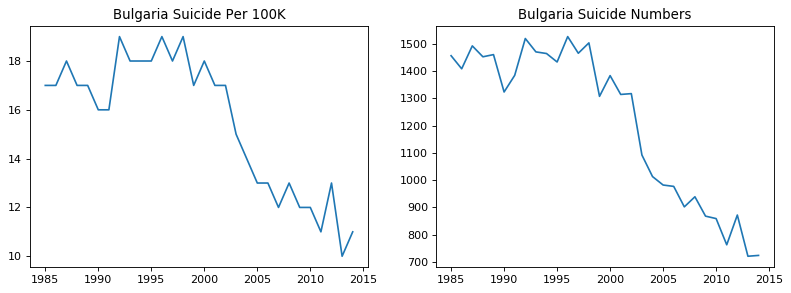

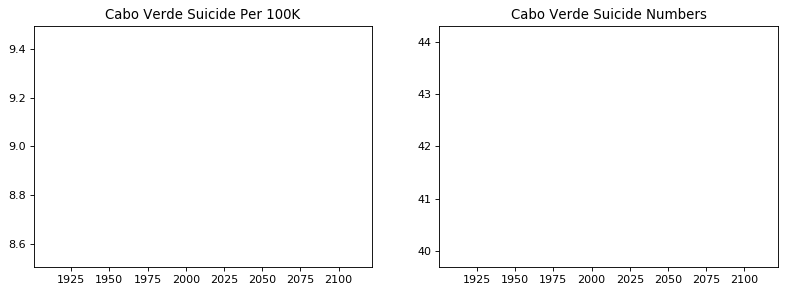

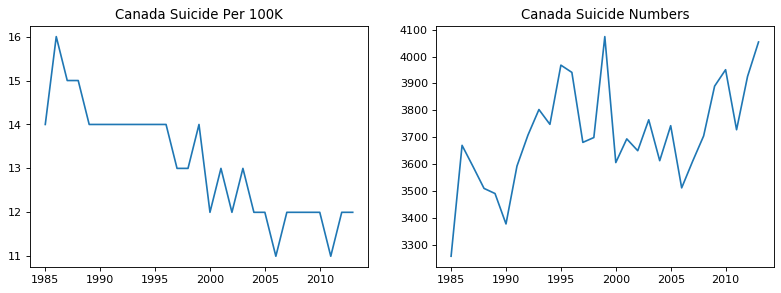

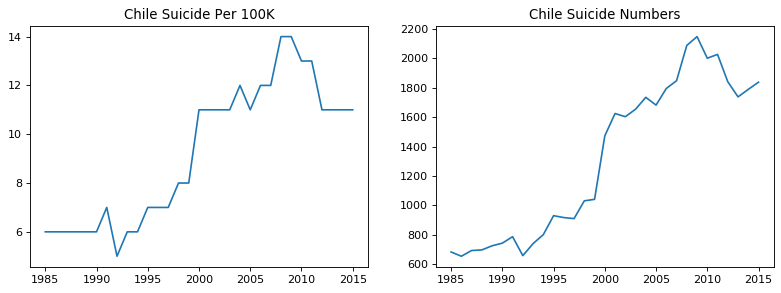

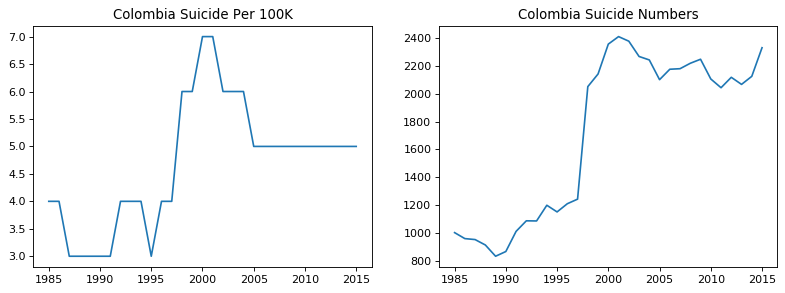

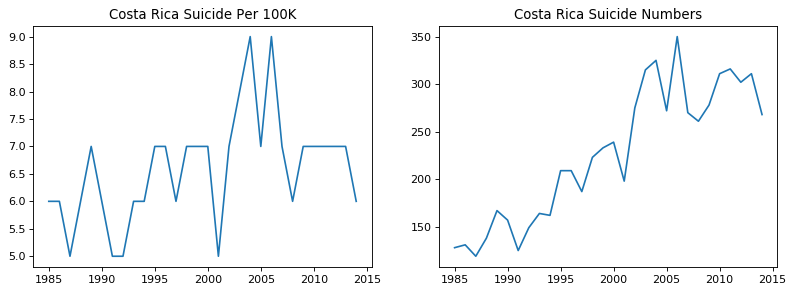

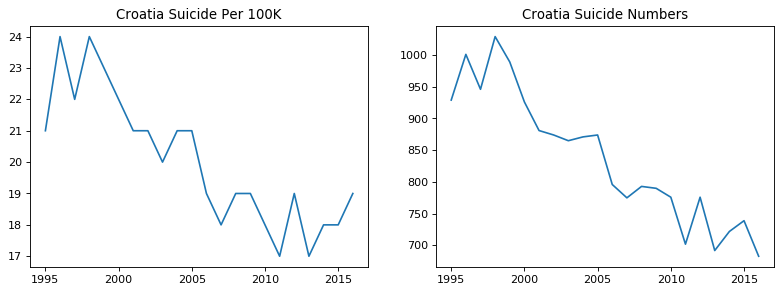

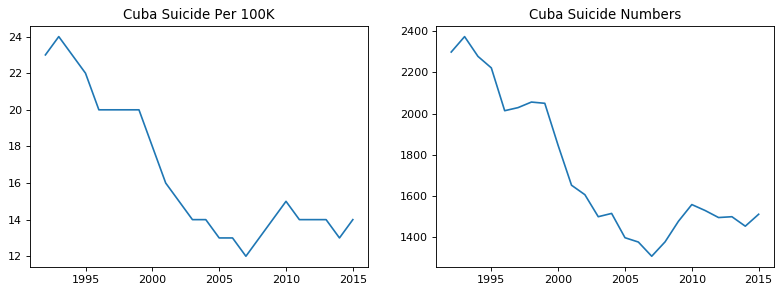

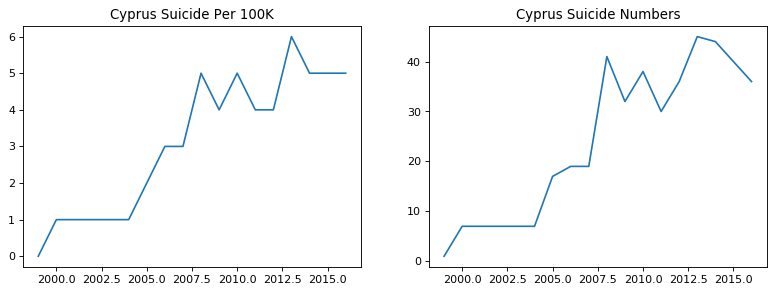

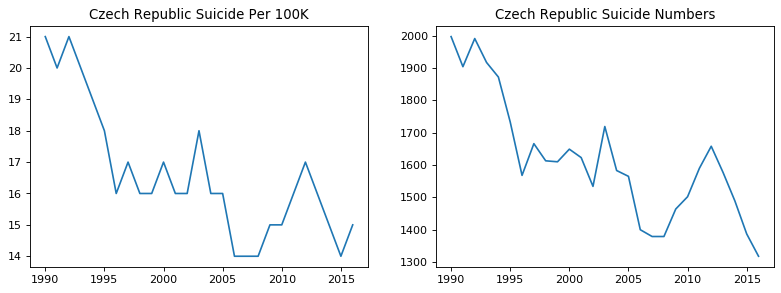

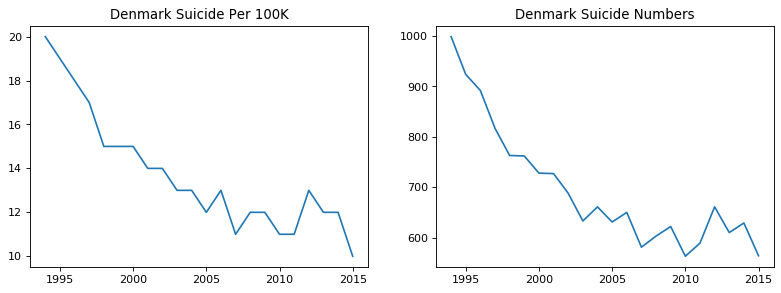

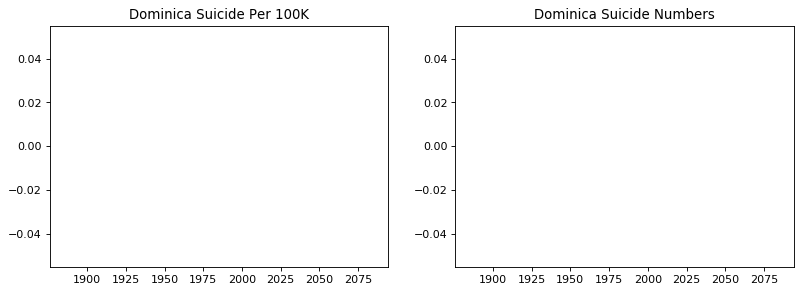

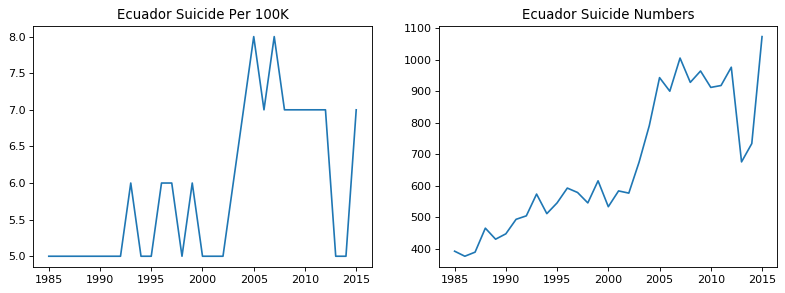

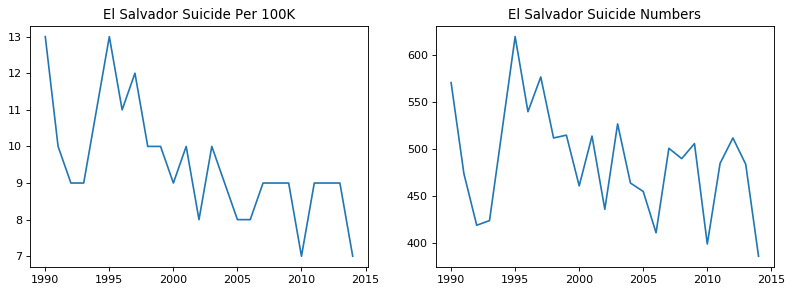

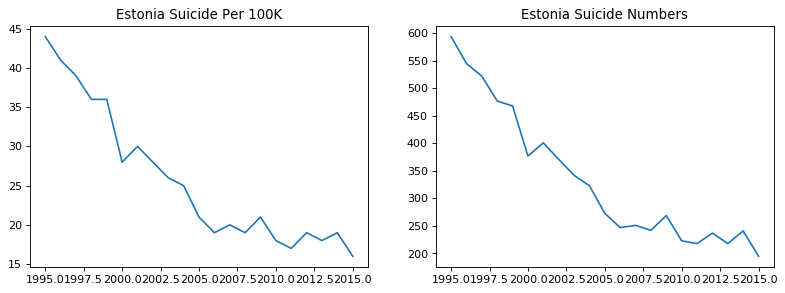

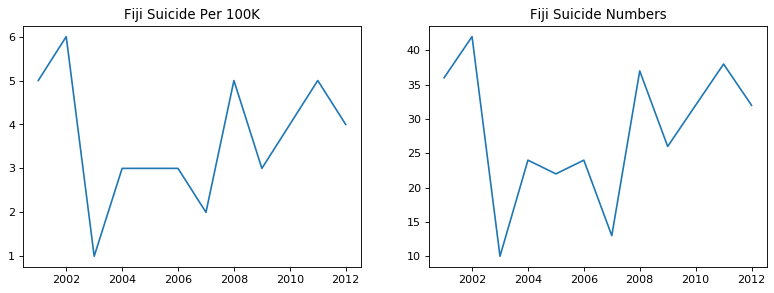

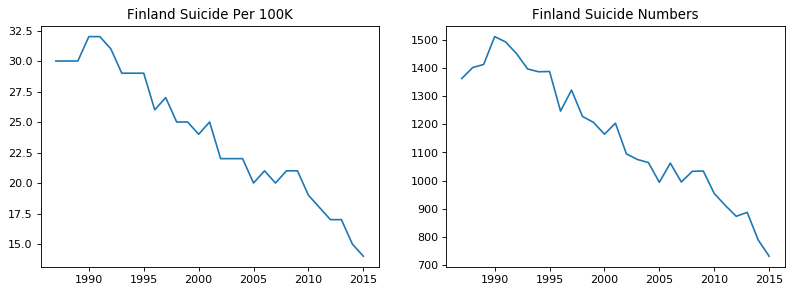

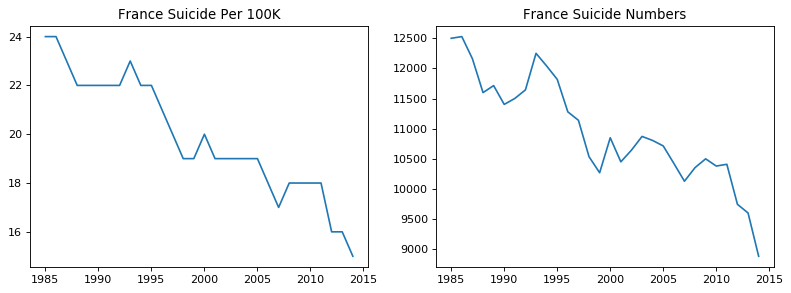

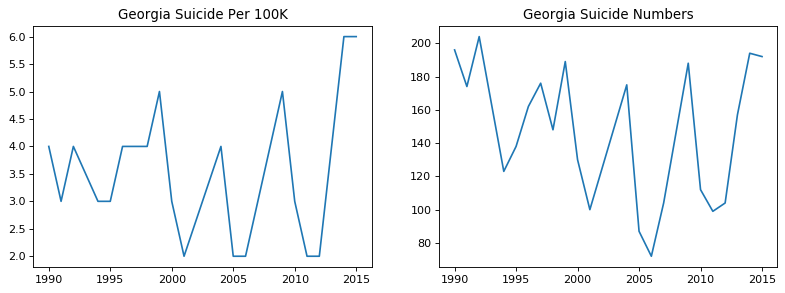

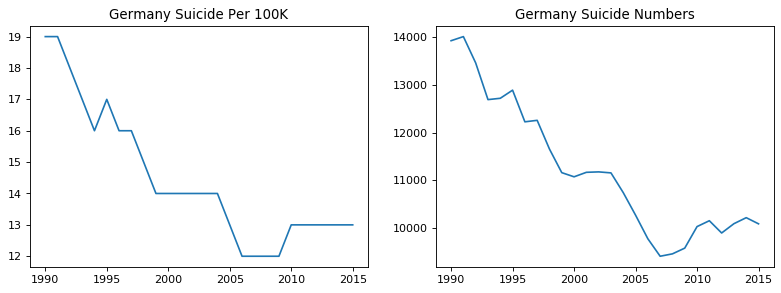

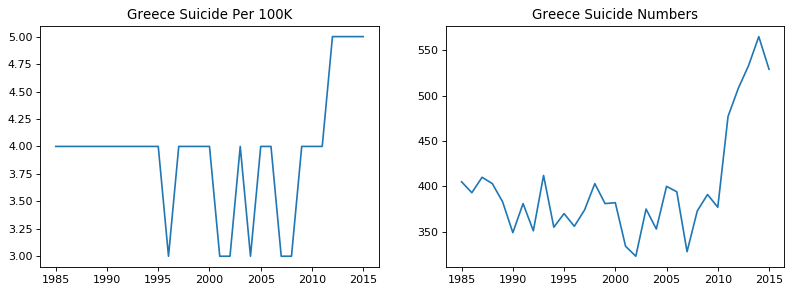

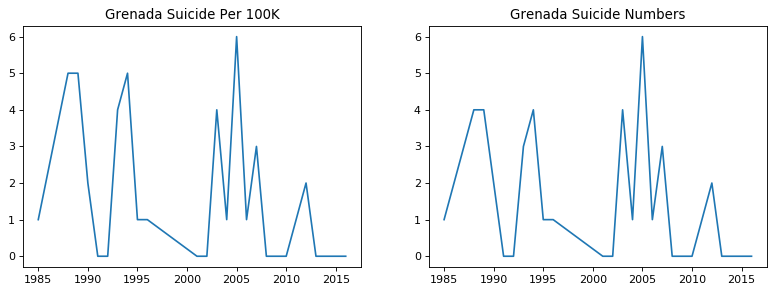

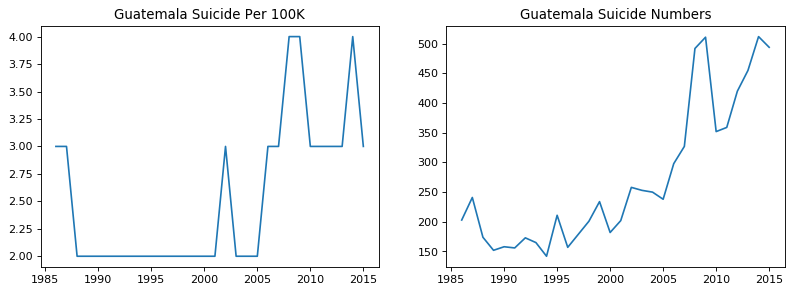

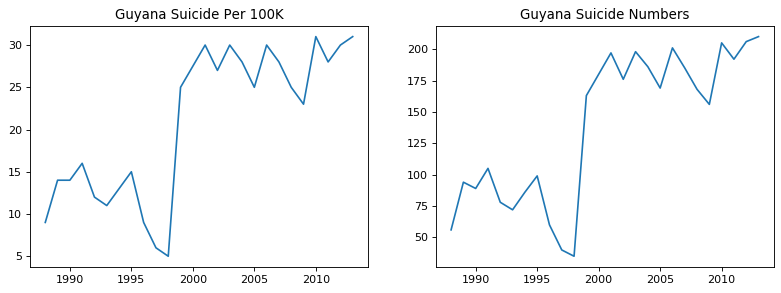

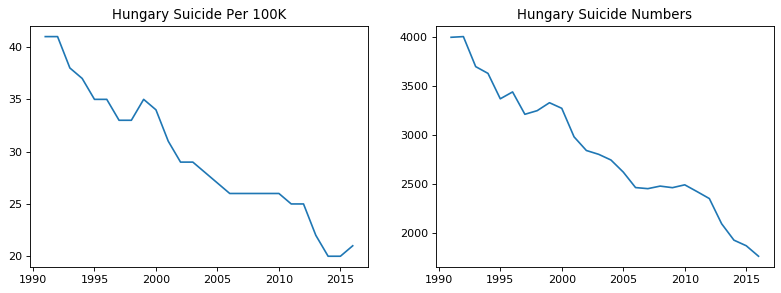

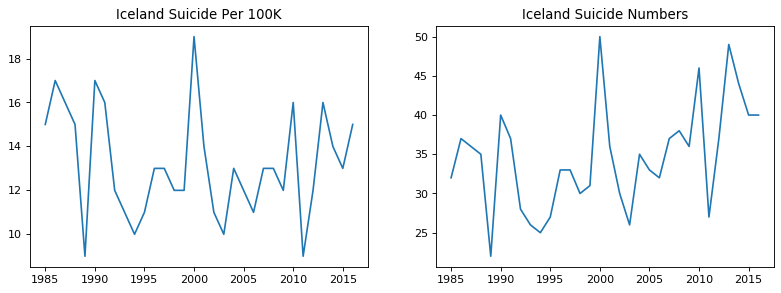

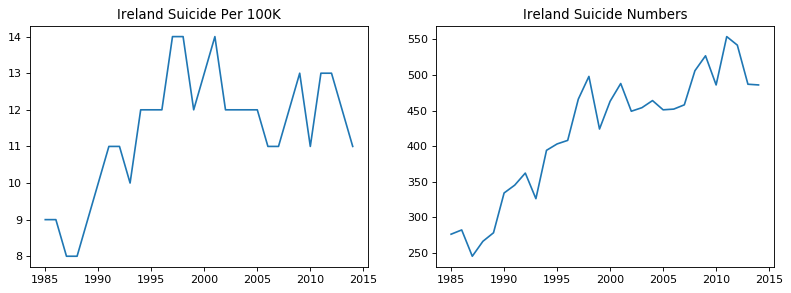

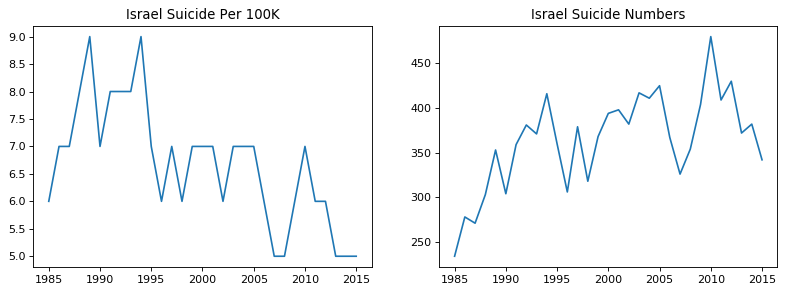

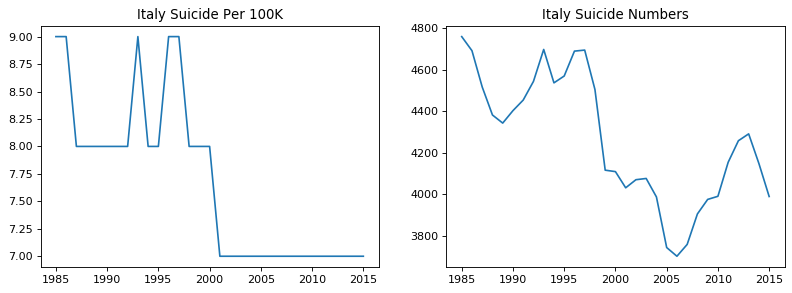

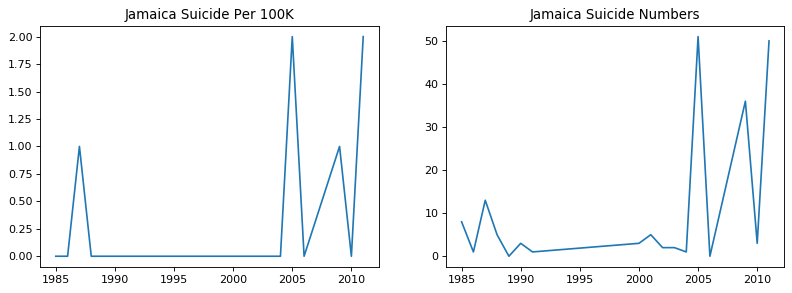

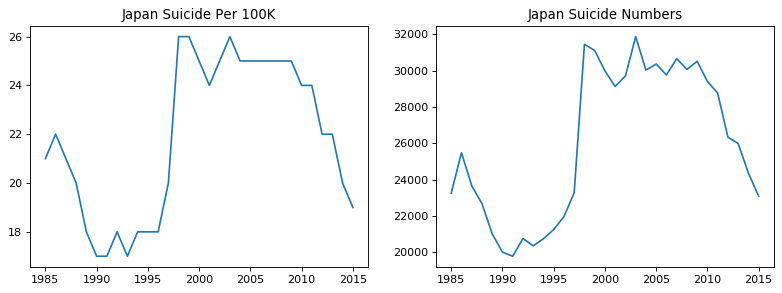

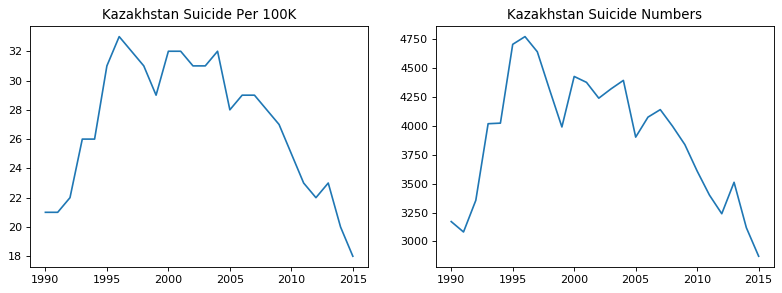

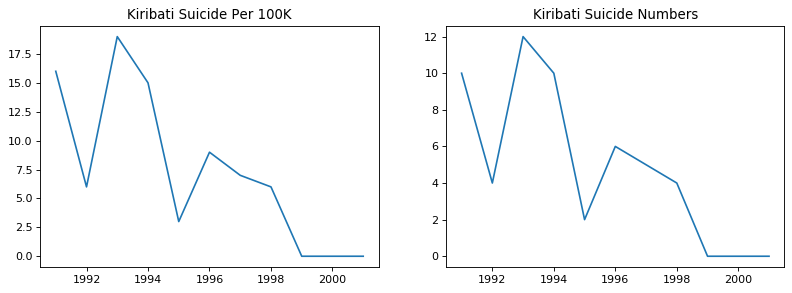

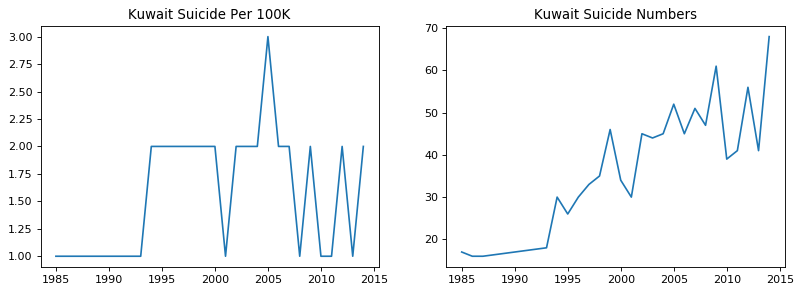

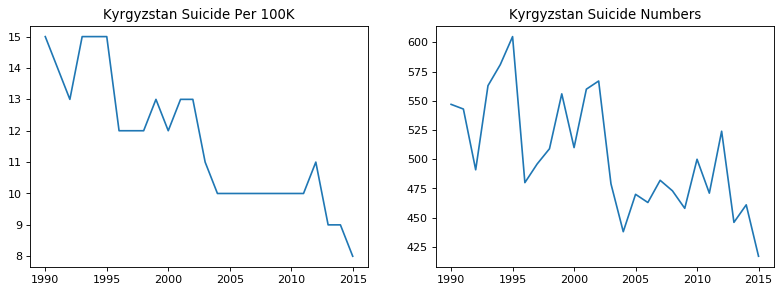

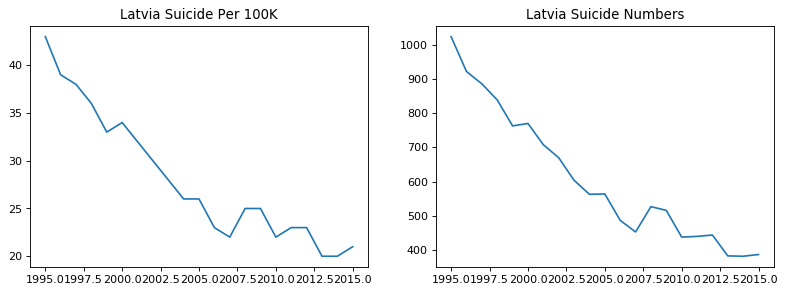

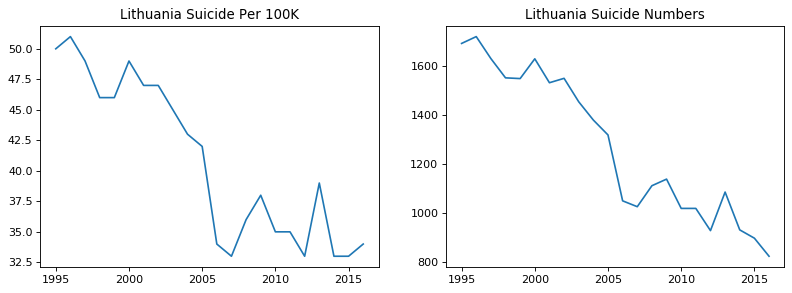

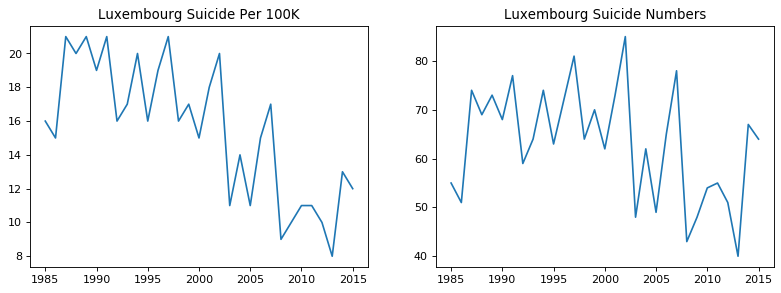

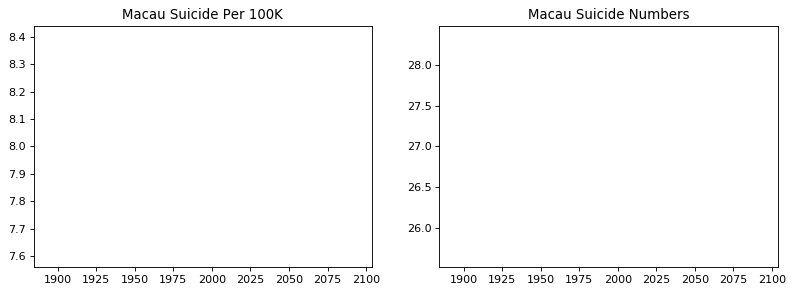

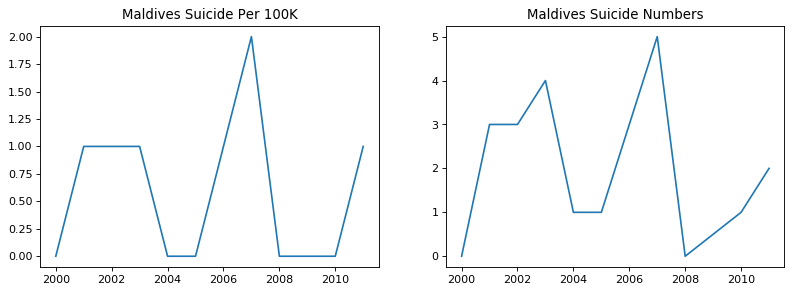

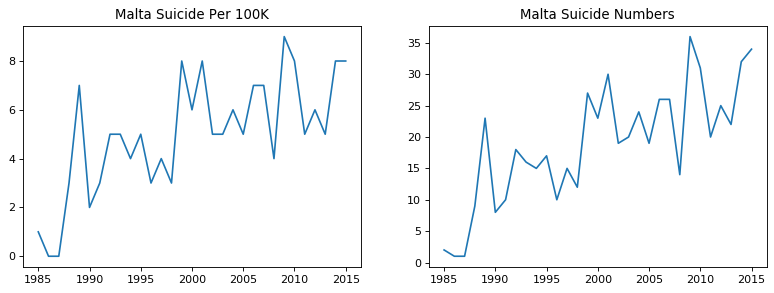

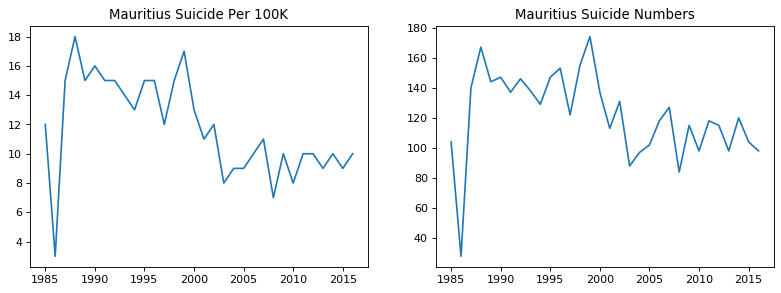

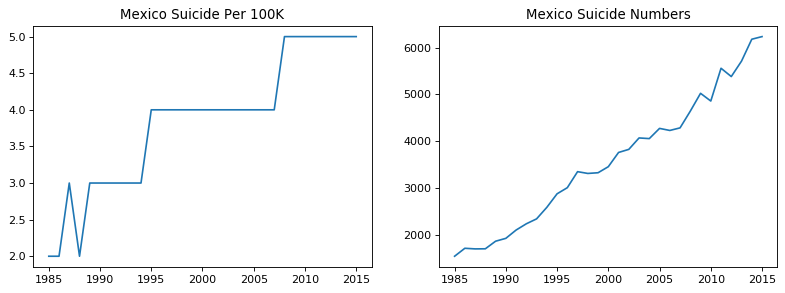

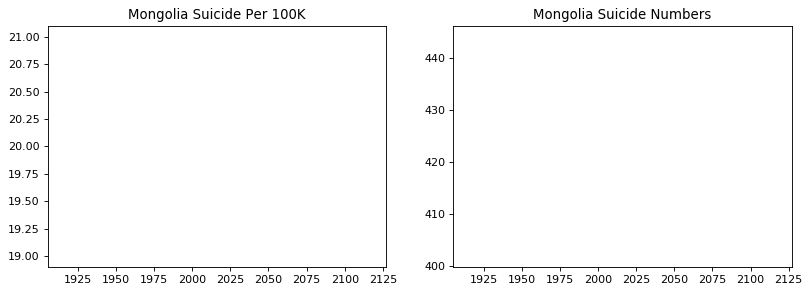

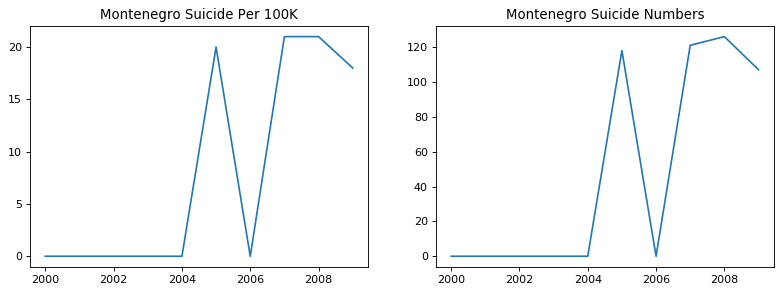

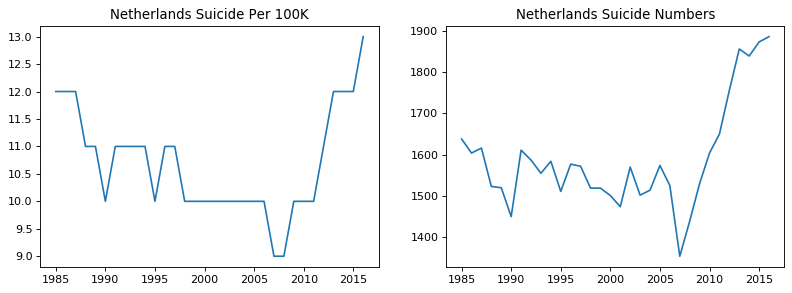

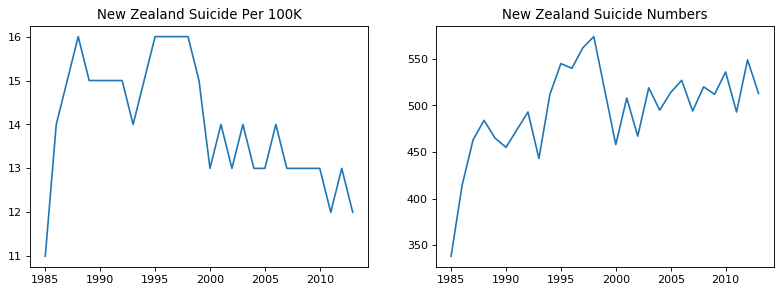

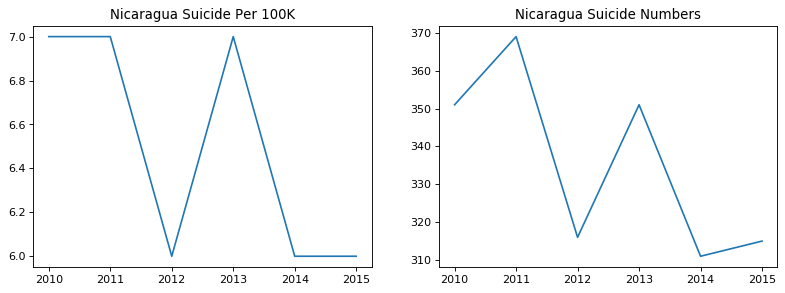

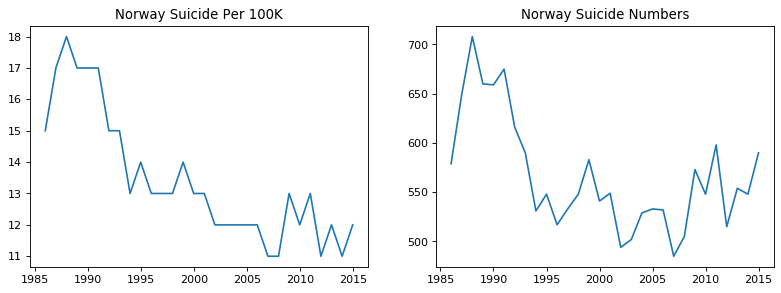

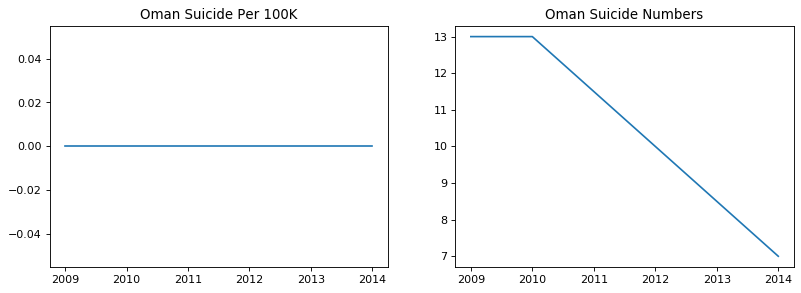

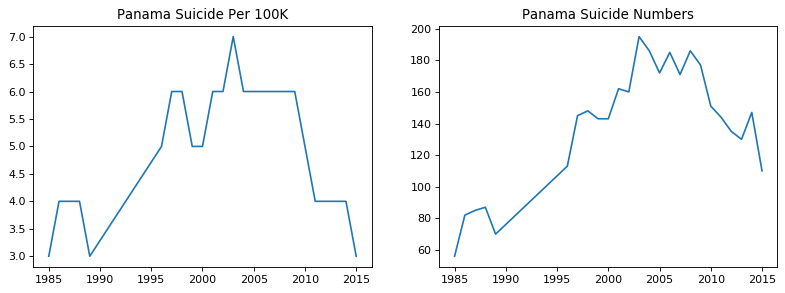

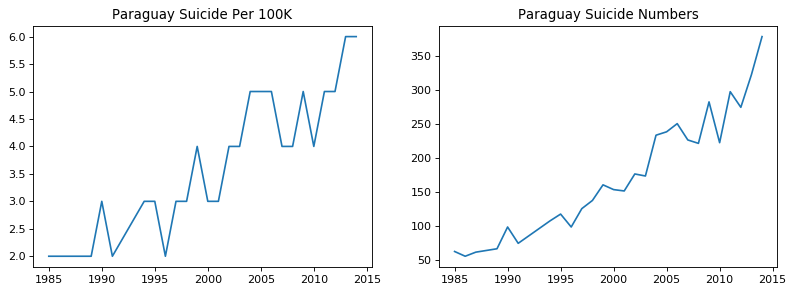

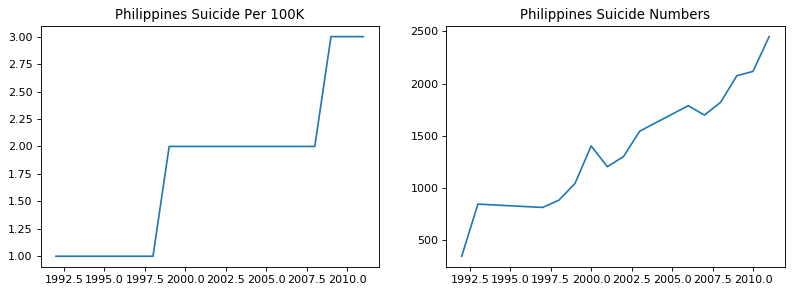

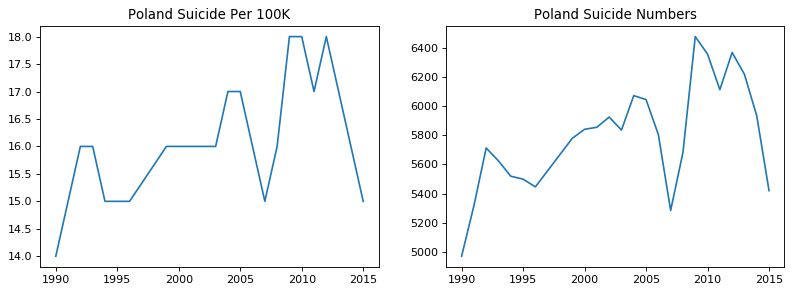

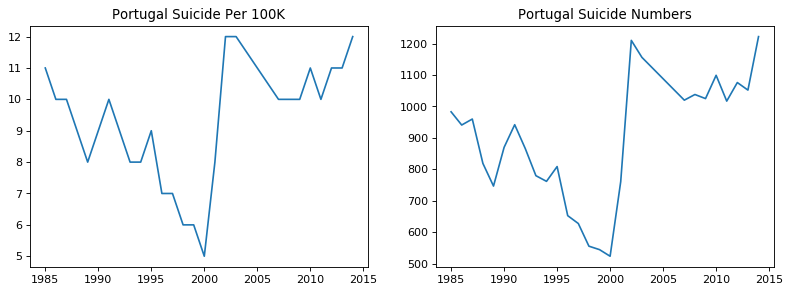

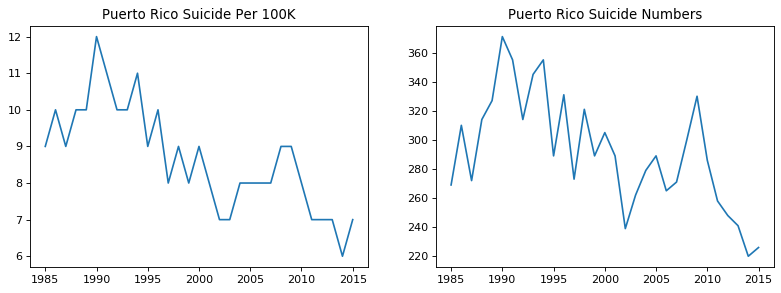

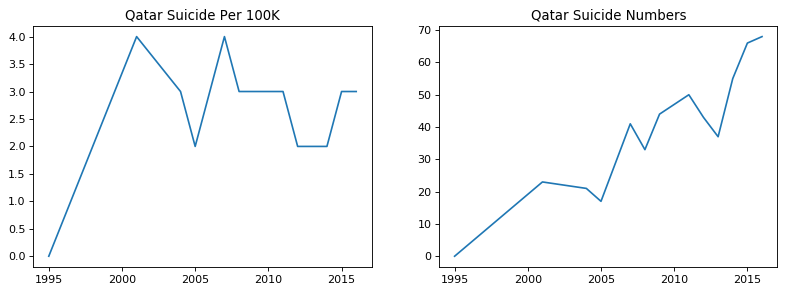

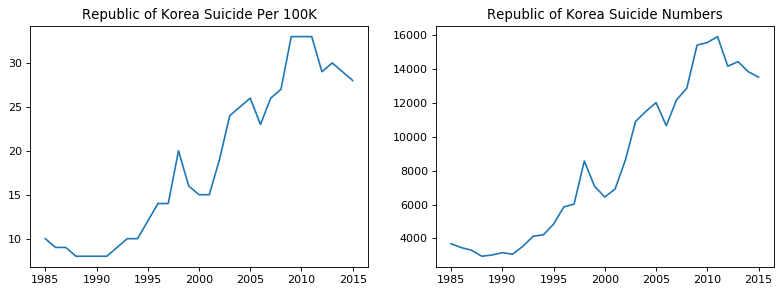

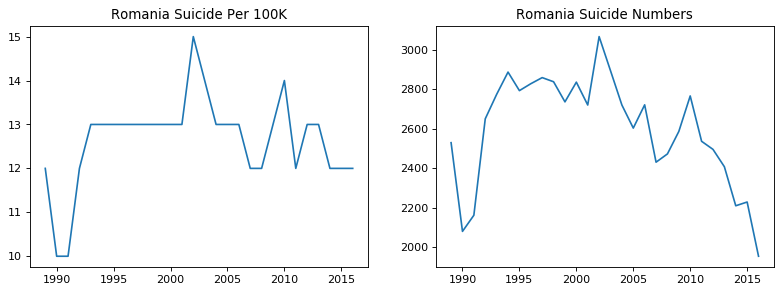

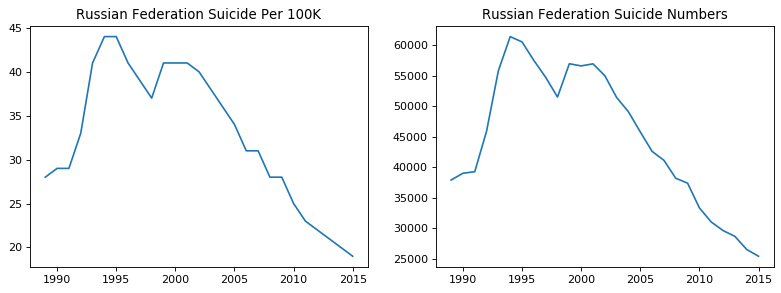

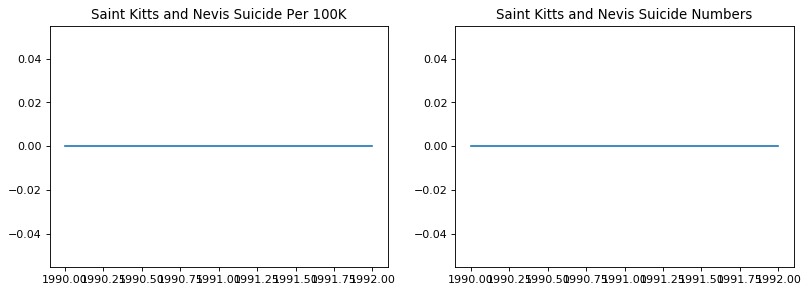

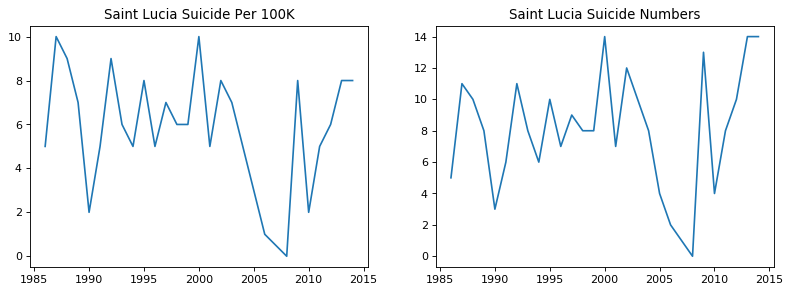

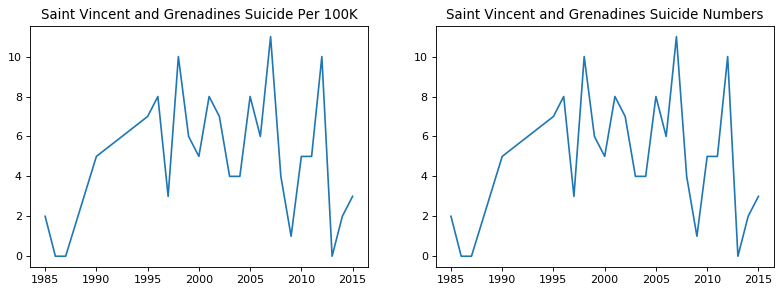

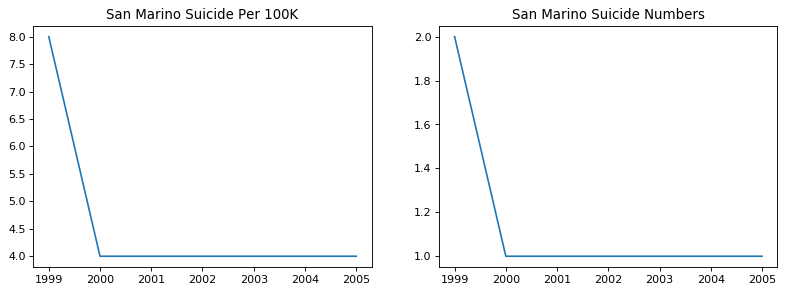

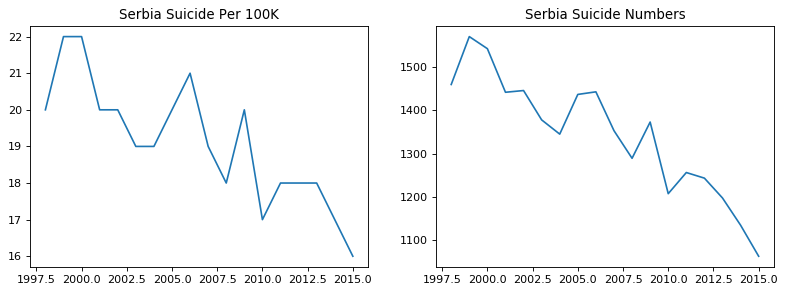

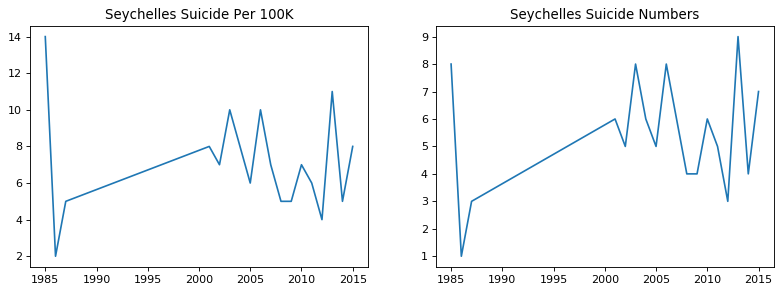

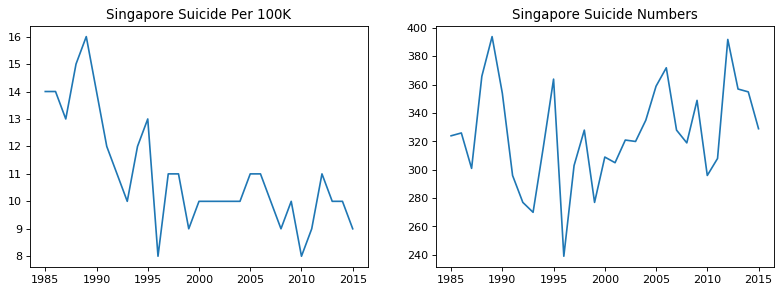

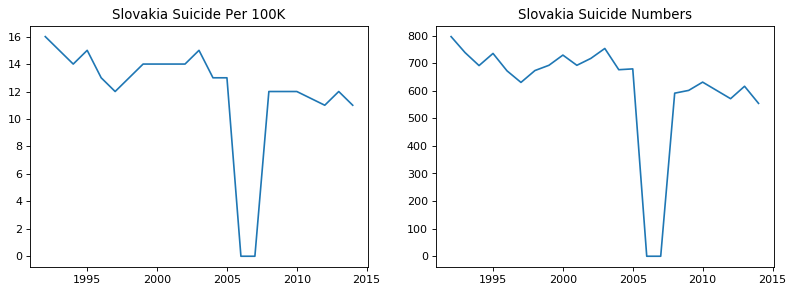

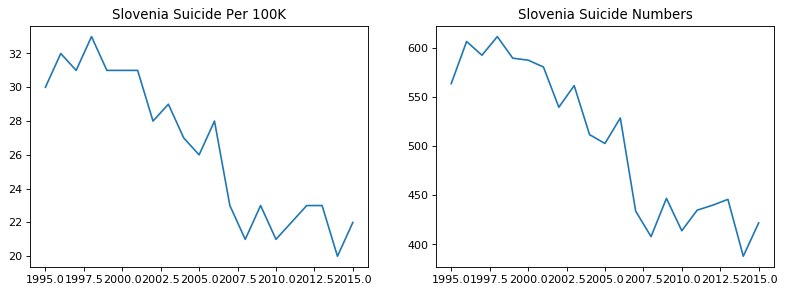

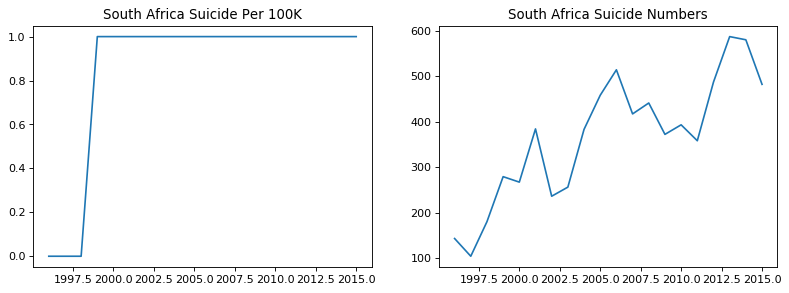

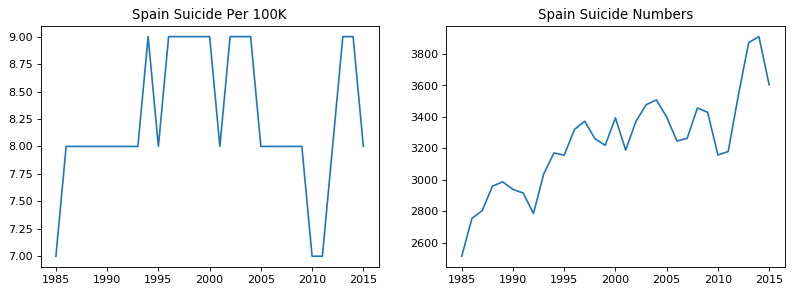

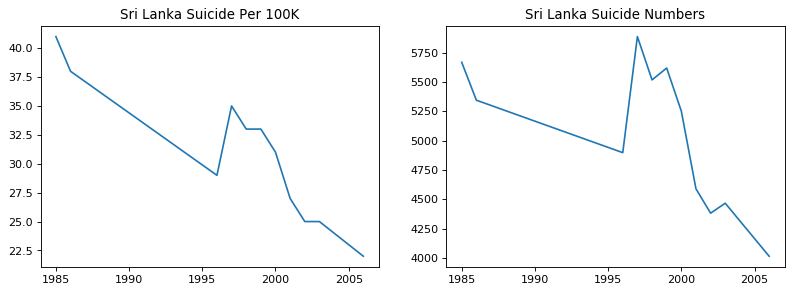

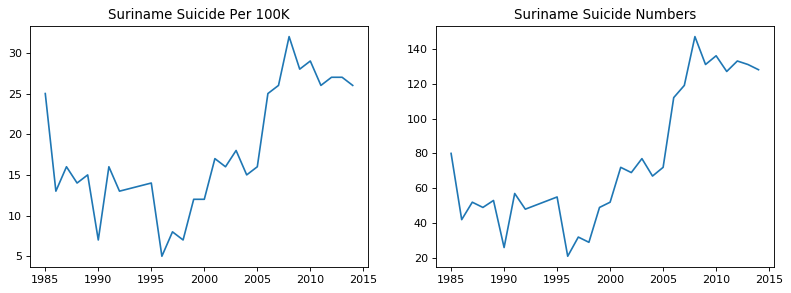

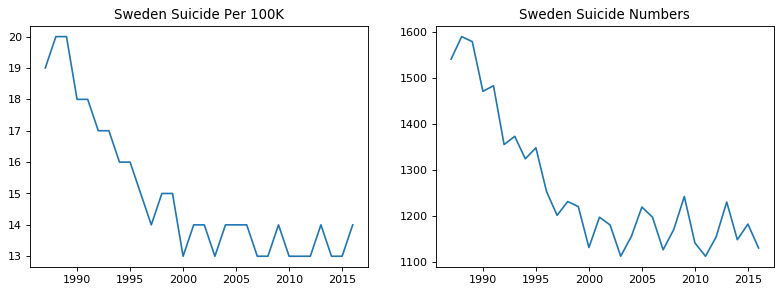

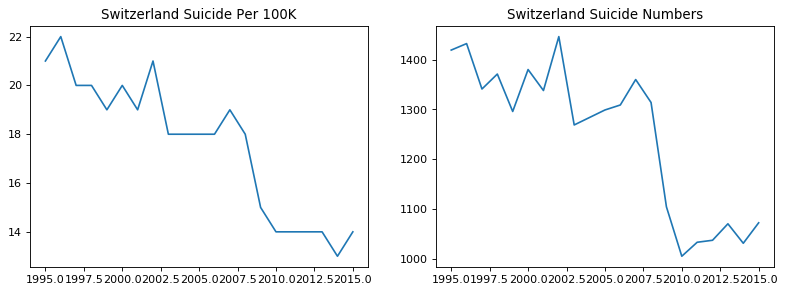

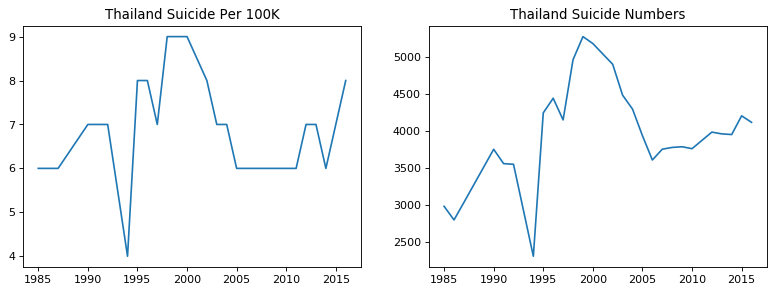

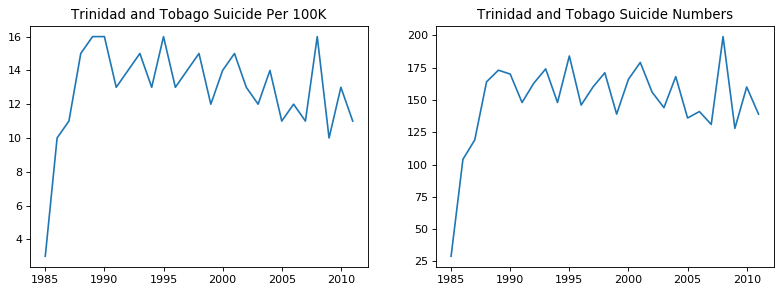

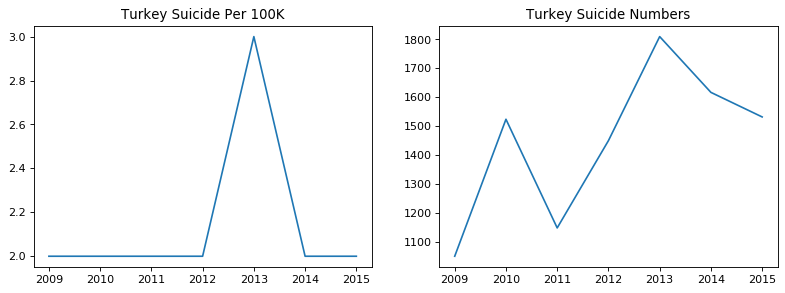

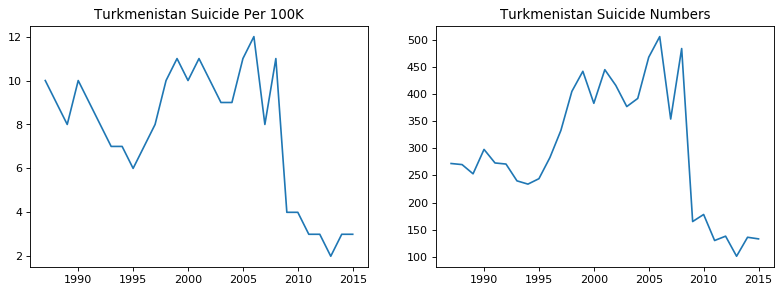

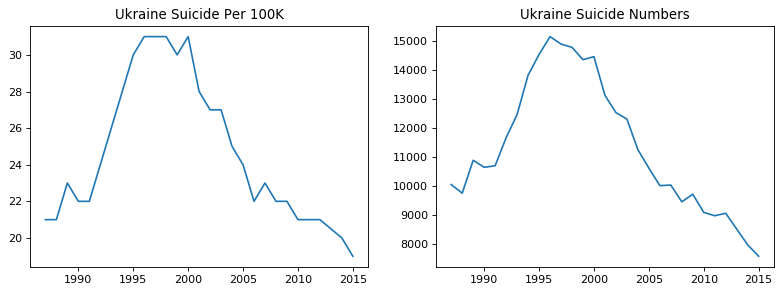

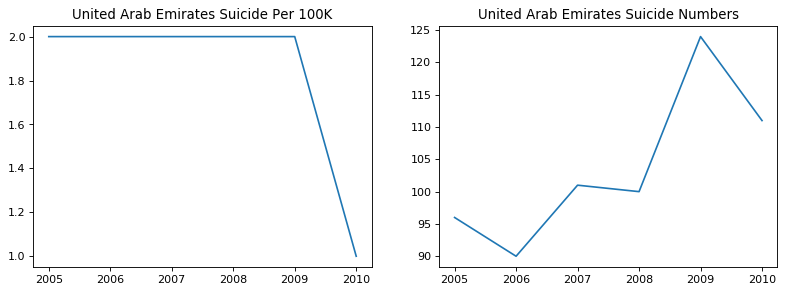

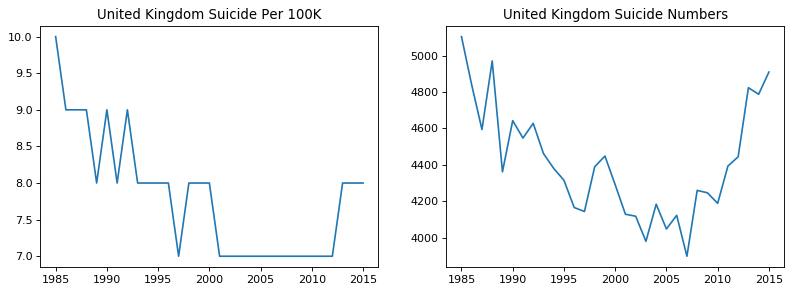

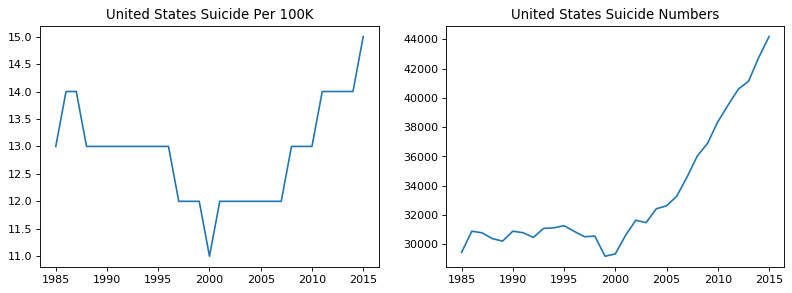

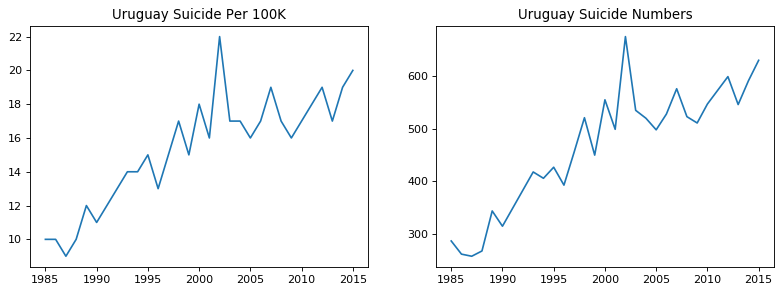

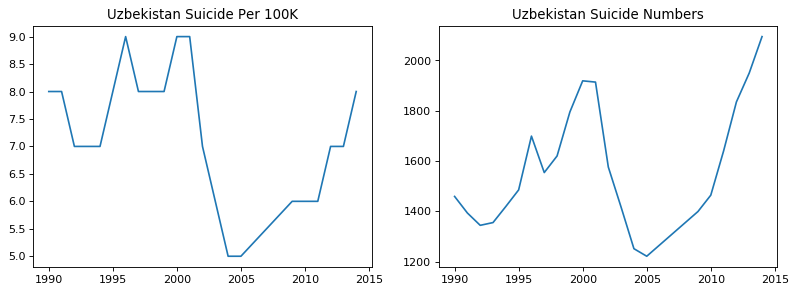

In [1]:
import numpy as np
import pandas as pd

from pandas import DataFrame

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import seaborn as sns

from pylab import *

%matplotlib inline

master = pd.read_csv(r'C:\Users\User\Desktop\Stats Course\Groupwork\suicide-rates-overview-1985-to-2016\master.csv')
pivot_suicide=master.pivot_table(index=['country','year'],values=['suicides_no','population'], aggfunc={'suicides_no':sum,'population':sum})

countries=pivot_suicide.index.get_level_values(0).unique()
for country in countries:
    
    split=pivot_suicide.xs(country)
    split['suicide_rate']=((split.suicides_no/split.population)*100000).round()
    split['year']=split.index
    
    df1=DataFrame(split,columns=['suicide_rate'])
    df2=DataFrame(split,columns=['suicides_no'])
    df3=DataFrame(split,columns=['year'])
    df4=DataFrame(split,columns=['population'])

    figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    
    subplot(1,2,1)
    title(country+' Suicide Per 100K')
    plot(df3,df1)
    
    subplot(1,2,2)
    title(country+' Suicide Numbers')
    plot(df3,df2)
    
    show()

In [2]:
bad_countries = ['Dominica','Grenada','Jamaica','Kiribati','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and Grenadines','San Marino',
'Seychelles','Albania','Antigua and Barbuda','Armenia','Aruba','Azerbaijan','Bahamas','Bahrain','Barbados','Belize','Bulgaria',
'Costa Rica','Cyprus','Macau','Maldives','Malta','Mongolia','Montenegro','Nicaragua','Oman']

master_good = master[~master['country'].isin(bad_countries)]

len(bad_countries)

28

In [3]:
master_good.country.describe()

count       22188
unique         73
top       Iceland
freq          382
Name: country, dtype: object

In [4]:
year_summary=master_good.groupby('year').agg(tot_suicide=('suicides_no','mean')).sort_values \
                                    (by='year',ascending=True).reset_index()
year_summary.head()

year  tot_suicide
0  1985   264.905093
1  1986   261.210526
2  1987   254.284553
3  1988   254.955128
4  1989   314.478175

In [5]:
age_against_suicides = master_good[['age','suicides/100k pop']]
age_against_suicides.head()

age  suicides/100k pop
588    75+ years              55.65
589  55-74 years              24.29
590  35-54 years              12.37
591  55-74 years               9.11
592  25-34 years               7.92

In [6]:
generation_summary=master_good.groupby('generation').agg(tot_suicide=('suicides/100k pop','mean')).sort_values(by='tot_suicide',ascending=False).reset_index()
generation_summary.head(10)

generation  tot_suicide
0  G.I. Generation    27.458467
1           Silent    21.352250
2          Boomers    16.960409
3     Generation X    12.078976
4       Millenials     6.161353
5     Generation Z     0.691227

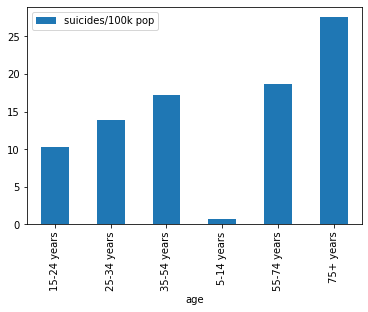

In [7]:
pivot_suicide=master_good.pivot_table(index=['age'],values=['suicides/100k pop'])

pivot_suicide.plot(kind='bar')

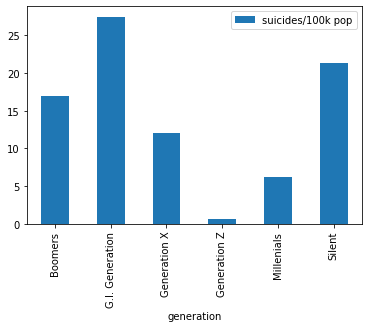

In [8]:
pivot_suicideGen=master_good.pivot_table(index=['generation'],values=['suicides/100k pop'])

pivot_suicideGen.plot(kind='bar')

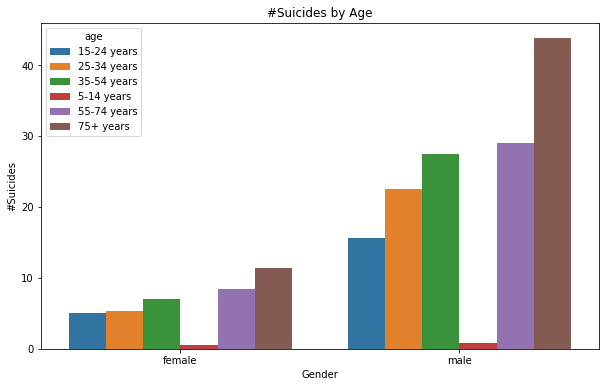

tot_suicide                                                          
age    15-24 years 25-34 years 35-54 years 5-14 years 55-74 years  75+ years
sex                                                                         
female    5.009465    5.328714    6.949946   0.512817    8.364257  11.380708
male     15.554127   22.539930   27.389492   0.844861   28.977520  43.774560

In [9]:
gender_age_summary=master_good.groupby(['sex','age']).agg(tot_suicide=('suicides/100k pop','mean')).reset_index()
gender_age_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides by Age')
ax=sns.barplot(x=gender_age_summary['sex'],y=gender_age_summary['tot_suicide'],hue=gender_age_summary['age']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
gender_age_summary1=master_good.groupby(['sex','age']).agg(tot_suicide=('suicides/100k pop','mean')).unstack()
gender_age_summary1.head()

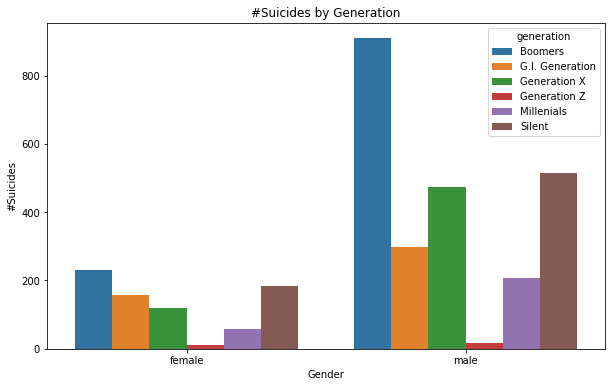

tot_suicide                                                        \
generation     Boomers G.I. Generation Generation X Generation Z  Millenials   
sex                                                                            
female      229.954819      158.750912   120.239156    10.241963   56.795455   
male        909.567269      299.294708   474.797577    16.340102  208.433962   

                        
generation      Silent  
sex                     
female      185.234548  
male        514.024564

In [10]:
generation_summary=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).reset_index()
generation_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides by Generation')
ax=sns.barplot(x=generation_summary['sex'],y=generation_summary['tot_suicide'],hue=generation_summary['generation']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
generation_summary1=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).unstack()
generation_summary1.head()

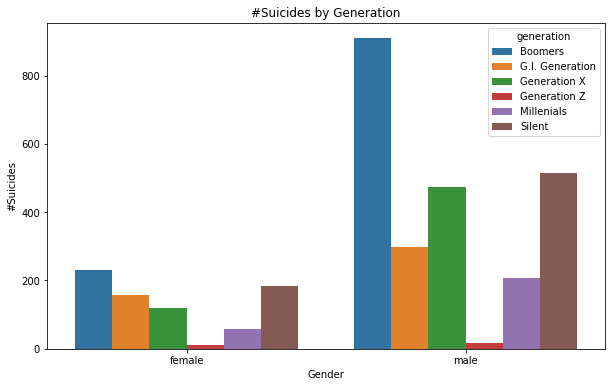

tot_suicide                                                        \
generation     Boomers G.I. Generation Generation X Generation Z  Millenials   
sex                                                                            
female      229.954819      158.750912   120.239156    10.241963   56.795455   
male        909.567269      299.294708   474.797577    16.340102  208.433962   

                        
generation      Silent  
sex                     
female      185.234548  
male        514.024564

In [11]:
generation_summary=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).reset_index()
generation_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides by Generation')
ax=sns.barplot(x=generation_summary['sex'],y=generation_summary['tot_suicide'],hue=generation_summary['generation']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
generation_summary1=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides_no','mean')).unstack()
generation_summary1.head()

In [12]:
pivot_generation=master_good.pivot_table(index=['country','year', 'generation', 'age'],values=['suicides/100k pop','population'], aggfunc={'suicides/100k pop':mean,'population':sum})

pivot_generation

population  suicides/100k pop
country    year generation      age                                       
Argentina  1985 Boomers         25-34 years     4419400              5.445
                G.I. Generation 55-74 years     4301000             16.700
                                75+ years        900000             31.645
                Generation X    15-24 years     4769400              4.695
                                5-14 years      5999400              0.450
...                                                 ...                ...
Uzbekistan 2014 Generation X    35-54 years     7042133              9.065
                Generation Z    5-14 years      5393758              1.920
                Millenials      15-24 years     6119722             11.345
                                25-34 years     5474388              8.765
                Silent          75+ years        573460              5.070

[11094 rows x 2 columns]

In [13]:
master_good.head()

country  year     sex          age  suicides_no  population  \
588  Argentina  1985    male    75+ years          202      363000   
589  Argentina  1985    male  55-74 years          485     1997000   
590  Argentina  1985    male  35-54 years          414     3346300   
591  Argentina  1985  female  55-74 years          210     2304000   
592  Argentina  1985    male  25-34 years          177     2234200   

     suicides/100k pop   country-year  HDI for year  gdp_for_year ($)   \
588              55.65  Argentina1985         0.694     88,416,668,900   
589              24.29  Argentina1985         0.694     88,416,668,900   
590              12.37  Argentina1985         0.694     88,416,668,900   
591               9.11  Argentina1985         0.694     88,416,668,900   
592               7.92  Argentina1985         0.694     88,416,668,900   

     gdp_per_capita ($)       generation  
588                3264  G.I. Generation  
589                3264  G.I. Generation  
590                3264           Silent  
591                3264  G.I. Generation  
592                3264          Boomers

In [14]:
by_Gen_Time = master_good.groupby(['generation','year']).mean().sort_values('suicides/100k pop', ascending=True).reset_index()
by_Age_Time = master_good.groupby(['age','year']).mean().sort_values('suicides/100k pop', ascending=True).reset_index()
by_Gen_Time

generation  year  suicides_no    population  suicides/100k pop  \
0         Millenials  1994    16.092593  2.469691e+06           0.608241   
1       Generation Z  2015    15.707547  2.309092e+06           0.629245   
2         Millenials  2000    15.568182  2.279963e+06           0.635606   
3       Generation Z  2014    14.492188  2.064624e+06           0.662578   
4         Millenials  1993    17.009615  2.600635e+06           0.665385   
..               ...   ...          ...           ...                ...   
141  G.I. Generation  1997   158.346154  5.875195e+05          30.792538   
142  G.I. Generation  1991   201.715686  6.575390e+05          31.097353   
143  G.I. Generation  1994   187.092593  6.389864e+05          31.456667   
144  G.I. Generation  1996   156.446154  5.760523e+05          31.544385   
145  G.I. Generation  1995   163.753968  5.701287e+05          33.292222   

     HDI for year  gdp_per_capita ($)  
0             NaN        13140.166667  
1             NaN        28595.905660  
2        0.764426        13380.363636  
3        0.818885        30384.765625  
4             NaN        12114.423077  
..            ...                 ...  
141           NaN        13574.707692  
142           NaN        11748.078431  
143           NaN        13140.166667  
144           NaN        14124.661538  
145      0.746327        14370.920635  

[146 rows x 7 columns]

Text(0.5, 1.0, 'Evolution of average sucide/100k of population by Generation')

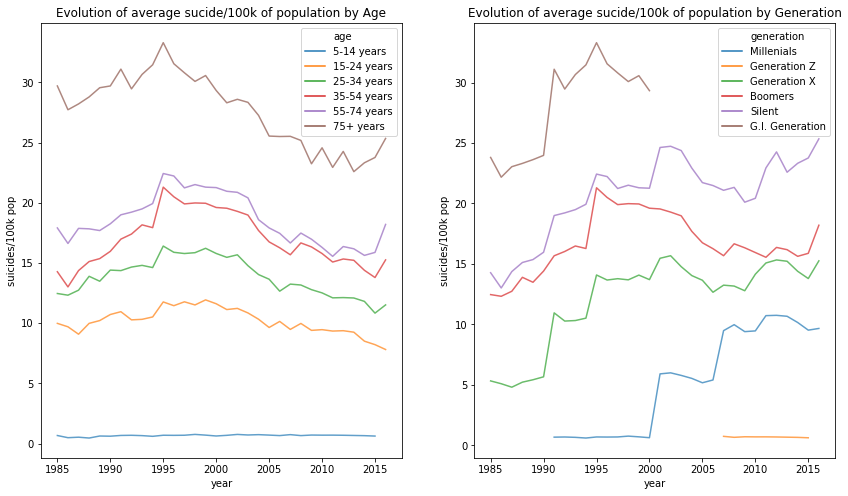

In [15]:
plt.figure(figsize=(22,8))
fig.subplots_adjust(hspace=.5)


plt.subplot(131)
sns.lineplot(x='year',y='suicides/100k pop', hue='age', data=by_Age_Time, alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Evolution of average sucide/100k of population by Age')

plt.subplot(132)
sns.lineplot(x='year',y='suicides/100k pop', hue='generation', data=by_Gen_Time, alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Evolution of average sucide/100k of population by Generation')

Text(0.5, 1.0, 'Generation Suicide Comparison')

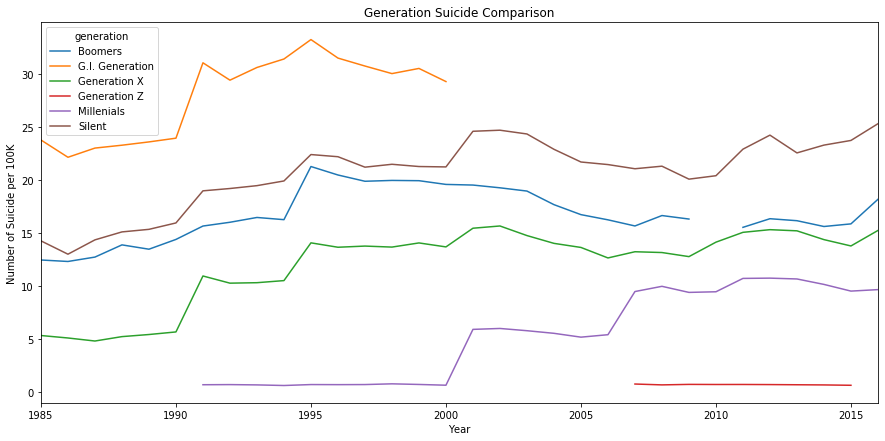

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['year', 'generation'])['suicides/100k pop'].mean().unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Suicide per 100K')
plt.title('Generation Suicide Comparison')

Text(0.5, 1.0, 'Country Suicide Comparison')

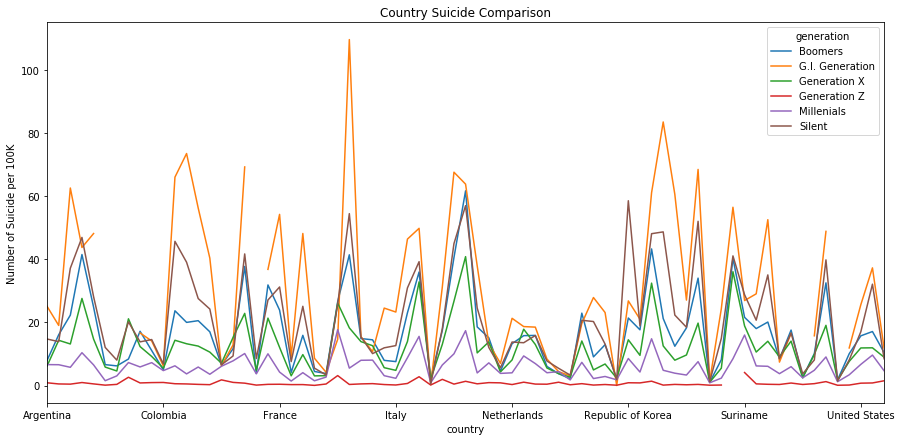

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['country', 'generation'])['suicides/100k pop'].mean().unstack().plot(ax=ax)
plt.xlabel('country')
plt.ylabel('Number of Suicide per 100K')
plt.title('Country Suicide Comparison')

Text(0.5, 1.0, 'Age Suicide Comparison')

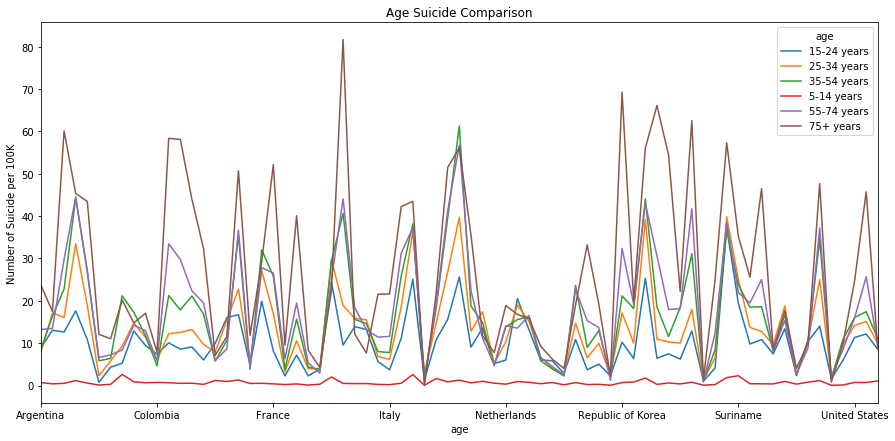

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['country', 'age'])['suicides/100k pop'].mean().unstack().plot(ax=ax)
plt.xlabel('age')
plt.ylabel('Number of Suicide per 100K')
plt.title('Age Suicide Comparison')

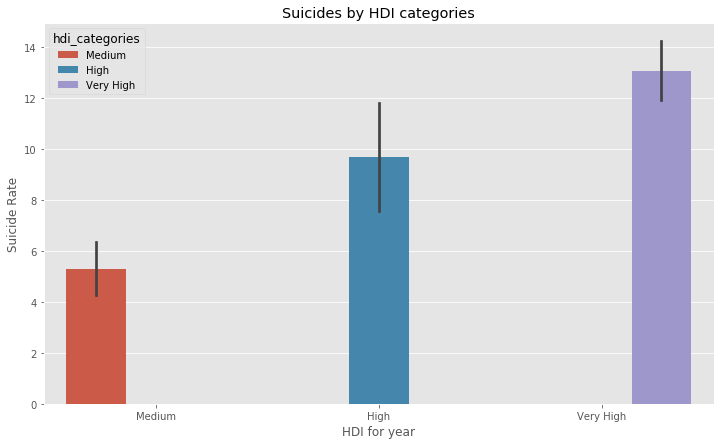

HDI for year  suicide_rate
HDI for year      1.000000      0.388487
suicide_rate      0.388487      1.000000

In [39]:
data_withHDI = master_good.copy()
data_withHDI = data_withHDI[data_withHDI['HDI for year'].notnull()]

data_withHDI = data_withHDI[data_withHDI['year'].isin([2010,2011,2012,2013,2014])]

countries = list(data_withHDI.pivot_table(values = 'HDI for year',index = 'country',columns = 'year') \
                 .dropna().reset_index()['country'])
data_withHDI = data_withHDI[data_withHDI['country'].isin(countries)]

by_hdi = data_withHDI.groupby(['HDI for year'])[['population','suicides_no']].sum().reset_index()
by_hdi['suicide_rate'] = by_hdi['suicides_no']*100000/by_hdi['population']

by_hdi['hdi_categories'] = np.where(by_hdi['HDI for year'] >=0.8, "Very High",
                             np.where(by_hdi['HDI for year'].between(0.7,0.799), "High",
                             np.where(by_hdi['HDI for year'].between(0.555,0.699),"Medium","Low")))


plt.figure(figsize=(12,7))
plt.style.use('ggplot')
ax = sns.barplot(x="hdi_categories", y="suicide_rate", hue= 'hdi_categories', data=by_hdi)
ax.set(ylabel='Suicide Rate', xlabel='HDI for year', title = 'Suicides by HDI categories')
plt.show()
by_hdi[['HDI for year','suicide_rate']].corr()